In [1]:
!ls

clip_curve.csv	clip_train_loss.csv  plot.ipynb


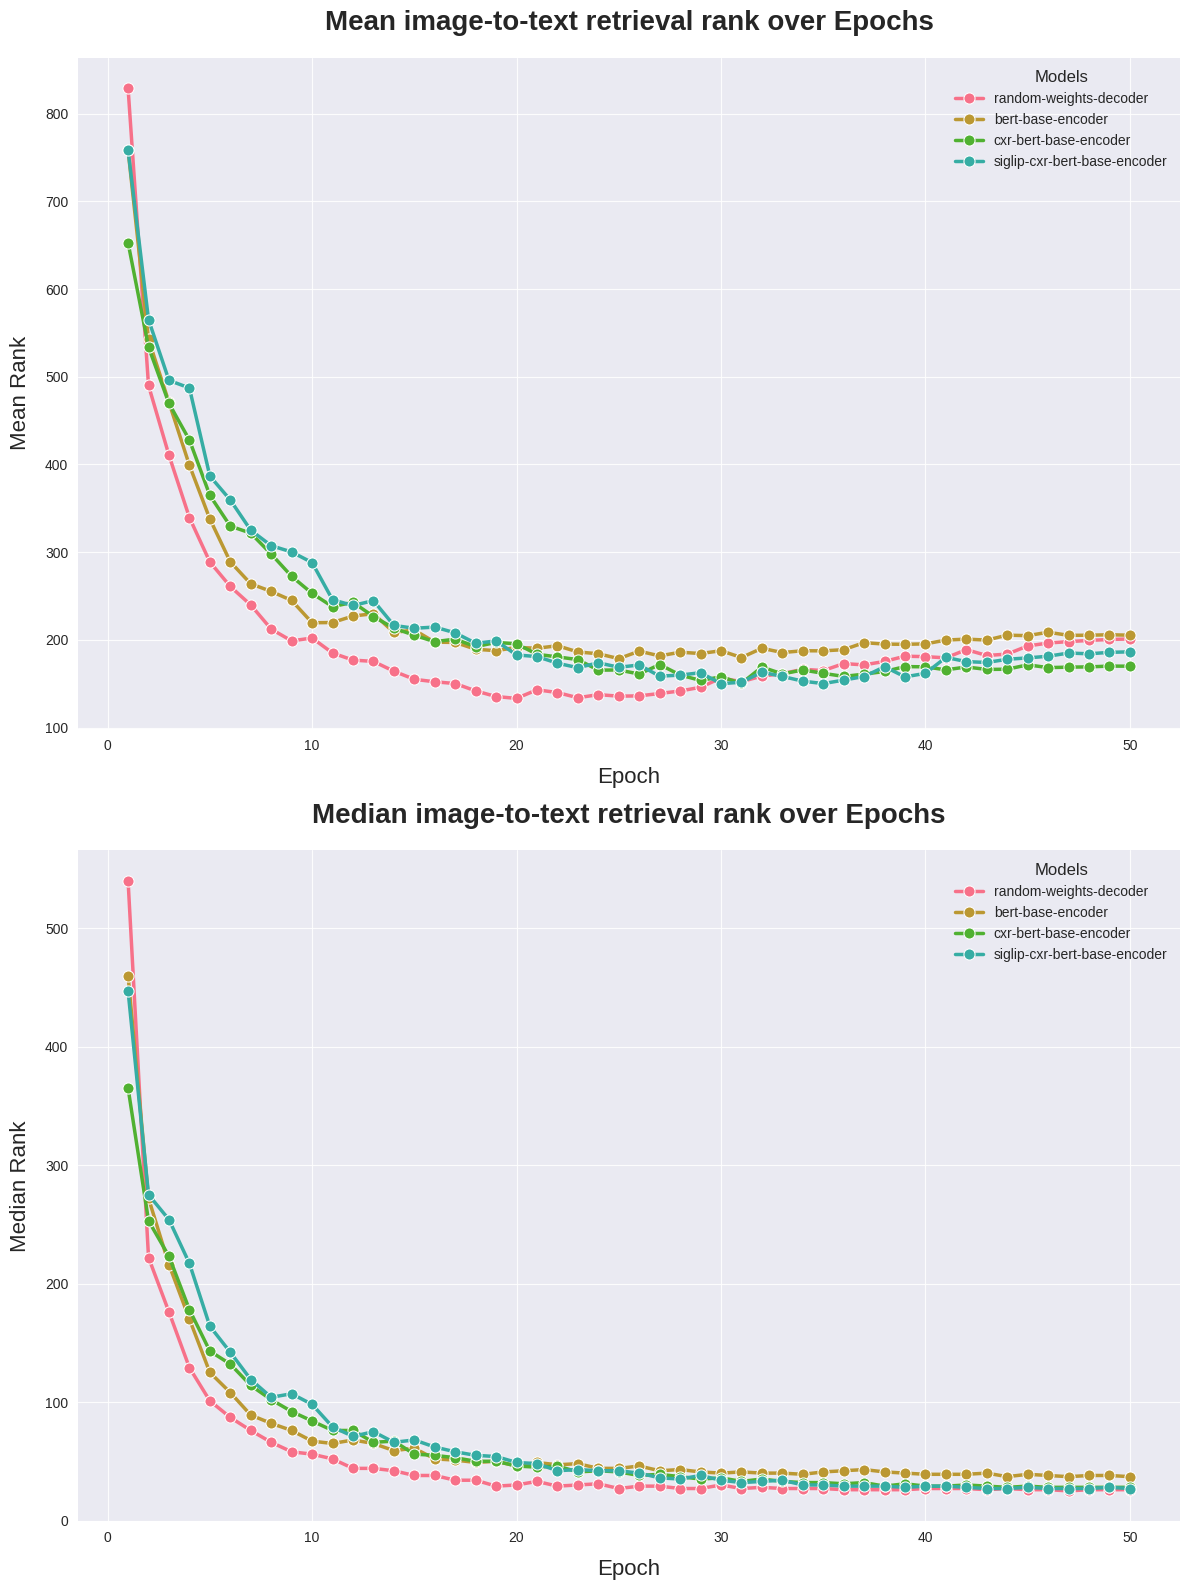

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for better visualization
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

def plot_retrieval_ranks(ax, data_path: str, title: str, ylabel: str):
    # Read the CSV file
    df = pd.read_csv(data_path)
    df.columns = df.columns.str.lower()
    
    # Reshape the DataFrame for seaborn
    df_melted = pd.melt(df, id_vars=['epoch'], 
                        value_vars=['random-weights-decoder', 'bert-base-encoder', 
                                    'cxr-bert-base-encoder', 'siglip-cxr-bert-base-encoder'],
                        var_name='model', value_name='loss')
    
    # Create the line plot on the given axis
    sns.lineplot(data=df_melted,
                 x='epoch',
                 y='loss',
                 hue='model',
                 marker='o',
                 linewidth=2.5,
                 markersize=8,
                 ax=ax)
    
    # Customize the plot
    ax.set_title(title, fontsize=20, pad=20, fontweight='bold')
    ax.set_xlabel('Epoch', fontsize=16, labelpad=10)
    ax.set_ylabel(ylabel, fontsize=16, labelpad=10)
    
    # Move legend to the top right, outside the plot
    ax.legend(title='Models',
              title_fontsize=12,
              fontsize=10,
              bbox_to_anchor=(1, 1),
              loc='upper right')
    
    # Customize grid with more prominent lines
    ax.grid(True, linestyle='-', alpha=0.9, linewidth=0.8)

# Create a figure with two subplots (one on top of the other)
fig, axes = plt.subplots(2, 1, figsize=(12, 16))

# Plot the mean retrieval ranks in the top subplot
plot_retrieval_ranks(axes[0],
                     data_path="clip_mean_curve.csv",
                     title='Mean image-to-text retrieval rank over Epochs',
                     ylabel='Mean Rank')

# Plot the median retrieval ranks in the bottom subplot
plot_retrieval_ranks(axes[1],
                     data_path="clip_median_curve.csv",
                     title='Median image-to-text retrieval rank over Epochs',
                     ylabel='Median Rank')

plt.tight_layout()
plt.show()


In [5]:
df = pd.read_csv(plot_path)
df.head()

,epoch,Random-weights-decoder,Bert-base-encoder,Cxr-bert-base-encoder
0,1,829.012406,758.542353,652.820508
1,2,490.118821,542.577244,533.910060
2,3,410.537895,470.824191,469.650901
3,4,339.473735,399.120954,427.920333
4,5,288.856561,337.884086,364.781159


In [6]:
df.columns

Index(['epoch', 'Random-weights-decoder', 'Bert-base-encoder',
       'Cxr-bert-base-encoder'],
      dtype='object')

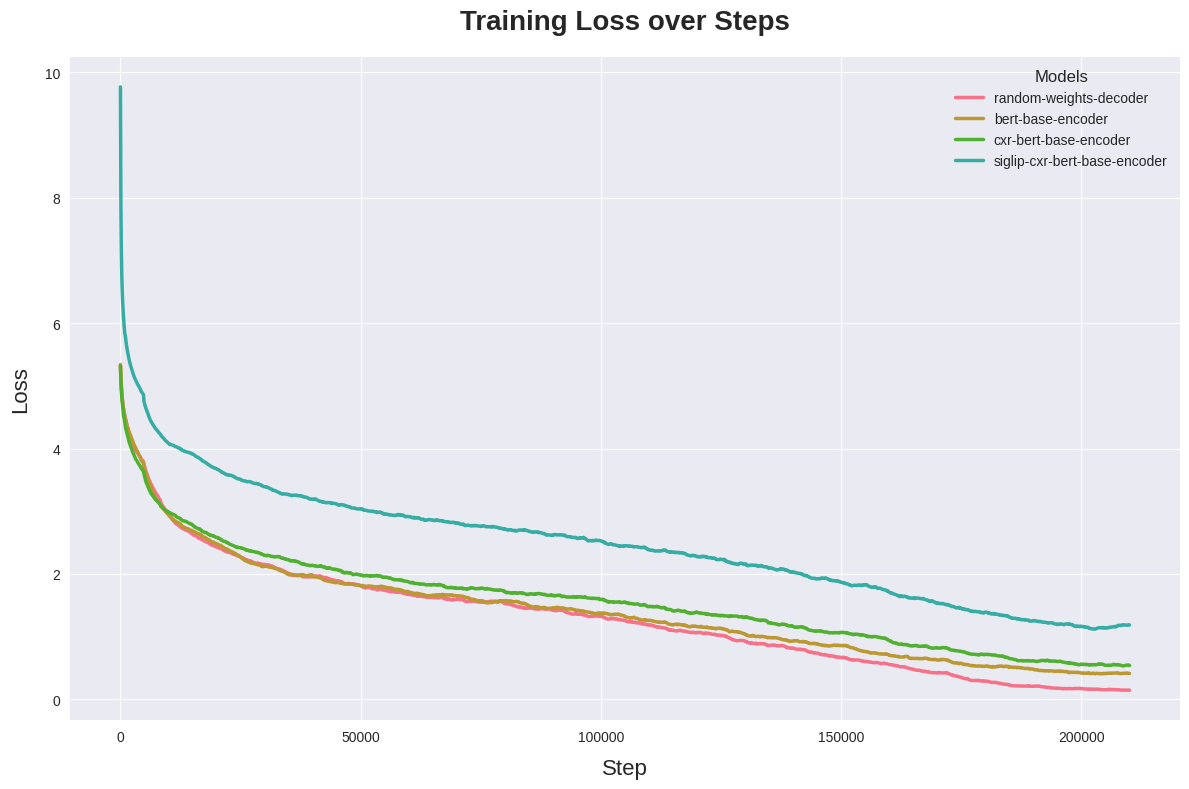

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the style for better visualization
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

def plot_train_loss(data_path: str, window_size: int = 50):
    # Read the CSV file
    df = pd.read_csv(data_path)
    
    # Convert column names to lowercase
    df.columns = df.columns.str.lower()
    
    # Create the plot with increased figure size for better visibility
    plt.figure(figsize=(12, 8))
    
    # Create the line plot with moving average
    df_melted = pd.melt(df, id_vars=['step'], 
                        value_vars=['random-weights-decoder', 'bert-base-encoder', 
                                    'cxr-bert-base-encoder', 'siglip-cxr-bert-base-encoder'],
                        var_name='model', value_name='loss')
    
    # Calculate moving average for each model
    for model in df_melted['model'].unique():
        model_data = df_melted[df_melted['model'] == model].copy()
        model_data['loss'] = model_data['loss'].rolling(window=window_size, min_periods=1).mean()
        
        sns.lineplot(data=model_data,
                    x='step',
                    y='loss',
                    label=model,
                    linewidth=2.5)
    
    # Customize the plot
    plt.title('Training Loss over Steps',
             fontsize=20,
             pad=20,
             fontweight='bold')
    
    plt.xlabel('Step', fontsize=16, labelpad=10)
    plt.ylabel('Loss', fontsize=16, labelpad=10)
    
    # Move legend to top right, outside the plot
    plt.legend(title='Models',
              title_fontsize=12,
              fontsize=10,
              bbox_to_anchor=(1, 1),
              loc='upper right')
    
    # Customize grid with more prominent lines
    plt.grid(True, linestyle='-', alpha=0.9, linewidth=0.8)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    return plt

# Usage
plot_path = "clip_train_loss.csv"
fig = plot_train_loss(plot_path)
plt.show()

In [25]:
!ls ../../process_outputs/dino_checkpoints/vit-b-16-all/

dino_vitb16_config.yaml  eval  logs  training_metrics.json


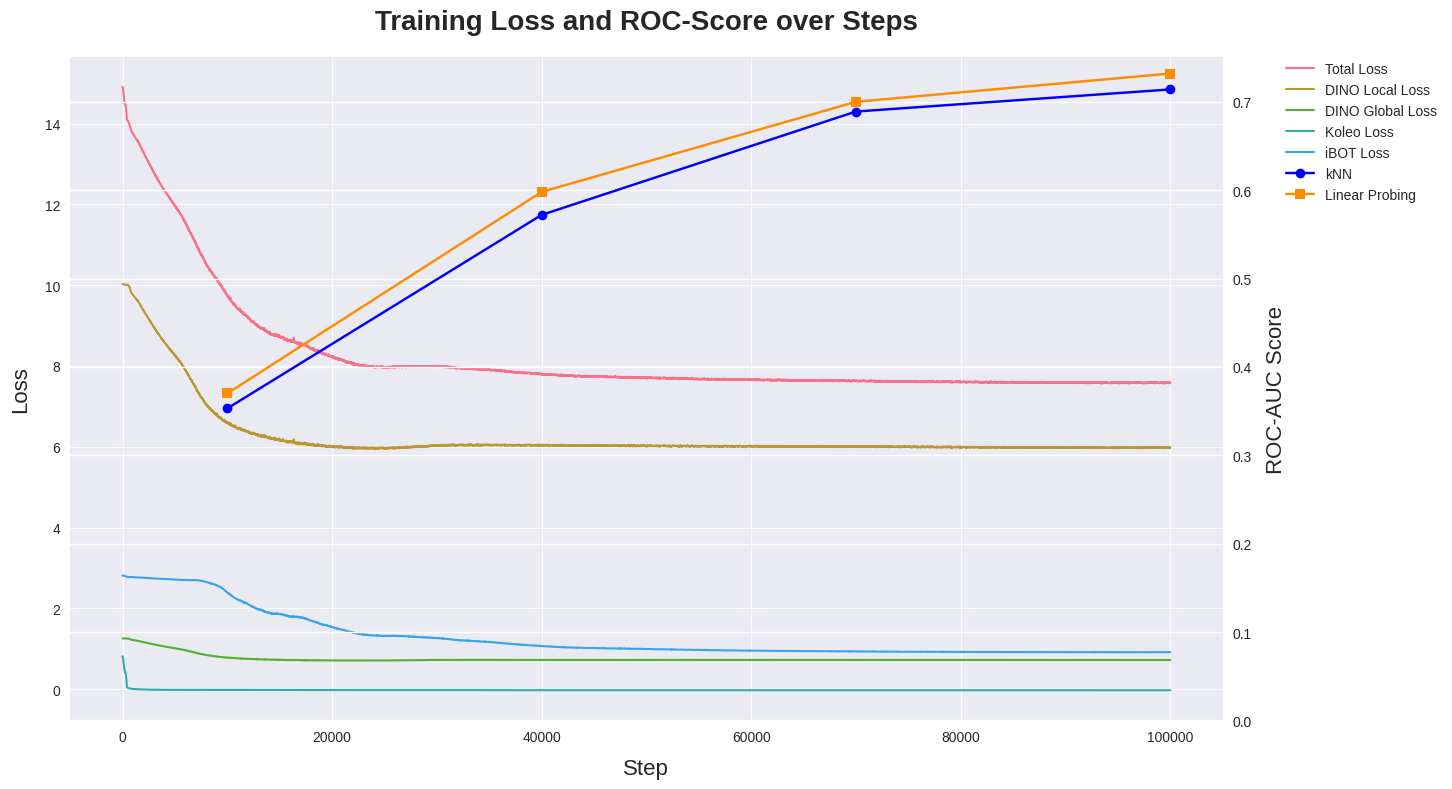

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for better visualization
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")  # affects only the loss lines by default

# Read your JSON file for the loss data
data = pd.read_json(
    "../../process_outputs/dino_checkpoints/vit-b-16-all/training_metrics.json",
    lines=True
)

# Create the figure and primary axis with a wider layout
fig, ax = plt.subplots(figsize=(14.5, 8))

# Melt the dataframe for seaborn (for plotting the various loss curves)
df_melted = pd.melt(
    data, 
    id_vars=['iteration'],
    value_vars=[
        'total_loss', 
        'dino_local_crops_loss', 
        'dino_global_crops_loss', 
        'koleo_loss', 
        'ibot_loss'
    ],
    var_name='loss_type', 
    value_name='loss'
)

# Rename the loss types to make them look better
rename_dict = {
    'total_loss': 'Total Loss',
    'dino_local_crops_loss': 'DINO Local Loss',
    'dino_global_crops_loss': 'DINO Global Loss',
    'koleo_loss': 'Koleo Loss',
    'ibot_loss': 'iBOT Loss'
}
df_melted['loss_type'] = df_melted['loss_type'].replace(rename_dict)

# Plot the losses on the primary y-axis
sns.lineplot(
    data=df_melted,
    x='iteration',
    y='loss',
    hue='loss_type',
    linewidth=1.5,
    marker=None,
    ax=ax
)

# Customize the primary axis
ax.set_title('Training Loss and ROC-Score over Steps', fontsize=20, pad=20, fontweight='bold')
ax.set_xlabel('Step', fontsize=16, labelpad=10)
ax.set_ylabel('Loss', fontsize=16, labelpad=10)
ax.grid(True, linestyle='-', alpha=0.9, linewidth=0.8)

# Capture the handles/labels from the primary plot and remove the default legend
loss_handles, loss_labels = ax.get_legend_handles_labels()
ax.legend().remove()

# Create a second y-axis for the ROC-AUC
ax2 = ax.twinx()

# Read your ROC-AUC data from CSV
df_eval = pd.read_csv("dino_eval_steps.csv")
steps = df_eval["steps"]
knn_roc = df_eval["knn_roc"]
linear_roc = df_eval["linear_roc"]

# Plot kNN and linear probing ROC-AUC on the second axis
line_knn, = ax2.plot(steps, knn_roc, marker='o', color='blue', label='kNN ROC-AUC')
line_linear, = ax2.plot(steps, linear_roc, marker='s', color='darkorange', label='Linear Probing ROC-AUC')

# Set the second y-axis label and ensure it starts from 0
ax2.set_ylabel('ROC-AUC Score', fontsize=16, labelpad=10)
ax2.set_ylim(bottom=0)

# Combine all handles/labels into one legend
roc_handles = [line_knn, line_linear]
roc_labels = ['kNN', 'Linear Probing']
all_handles = loss_handles + roc_handles
all_labels = loss_labels + roc_labels

# Adjust the figure so there's more space on the right for the legend
fig.subplots_adjust(right=0.75)

# Place the legend fully outside on the right
ax2.legend(
    all_handles, 
    all_labels, 
    loc='upper left',
    bbox_to_anchor=(1.05, 1),
    borderaxespad=0.
)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()
